In [1]:
import pandas as pd
from io import StringIO
import pylab

df = pd.read_csv('googleplaystore_user_reviews.csv', encoding = "ISO-8859-1")
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [2]:
columnNames = list(df.head(0)) 
print(columnNames)

['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']


In [3]:
df = df[pd.notnull(df['Translated_Review'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity    37427 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [4]:
col = ['Sentiment', 'Translated_Review']
df = df[col]

df.columns = ['Sentiment', 'Translated_Review']
df.columns

Index(['Sentiment', 'Translated_Review'], dtype='object')

In [5]:
df['sentiment_id'] = df['Sentiment'].factorize()[0]
sentiment_id_df = df[['Sentiment', 'sentiment_id']].drop_duplicates().sort_values('sentiment_id')
sentiment_to_id = dict(sentiment_id_df.values)
id_to_sentiment = dict(sentiment_id_df[['sentiment_id', 'Sentiment']].values)
df.head()

,Sentiment,Translated_Review,sentiment_id
0,Positive,I like eat delicious food. That's I'm cooking ...,0
1,Positive,This help eating healthy exercise regular basis,0
3,Positive,Works great especially going grocery store,0
4,Positive,Best idea us,0
5,Positive,Best way,0


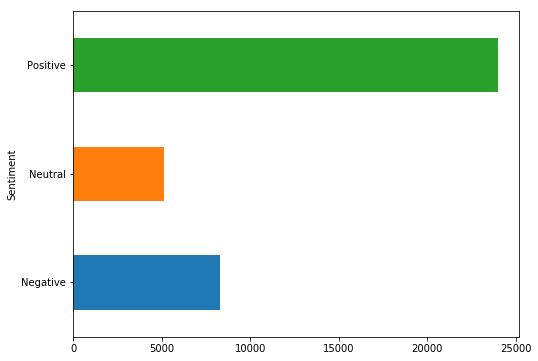

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Sentiment').Translated_Review.count().plot.barh(ylim=0)
plt.show()

In [7]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Translated_Review).toarray()
labels = df.sentiment_id
features.shape

(37427, 19541)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(df['Translated_Review'], df['Sentiment'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [9]:
print(clf.predict(count_vect.transform(["great app."])))

['Positive']


In [10]:
df[df['Translated_Review'] == "It has been slowed down since the last update. It's hard for me to pay for the product ... I'll give up when I'm alive."]

,Sentiment,Translated_Review,sentiment_id
274,Negative,It has been slowed down since the last update....,2


In [11]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)

In [13]:
from IPython.display import display

for predicted in sentiment_id_df.sentiment_id:
  for actual in sentiment_id_df.sentiment_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_sentiment[actual], id_to_sentiment[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Sentiment', 'Translated_Review']])
      print('')

'Neutral' predicted as 'Positive' : 258 examples.


,Sentiment,Translated_Review
13293,Neutral,The really helpful. The section analysis remov...
2473,Neutral,ABC News like ABC 7 ABC Network
51674,Neutral,I'm waiting 2 years fix problems I app. I've s...
29018,Neutral,It could read contact show restored google
48582,Neutral,"Another battery sapping, time wasting app."
719,Neutral,It diet chart also. It helpful us. According e...
44262,Neutral,Everytime try register says email address alre...
54171,Neutral,Work pop adds hanging login
49639,Neutral,I really love advent useless
1037,Neutral,Need phone permission? No way.



'Negative' predicted as 'Positive' : 388 examples.


,Sentiment,Translated_Review
39283,Negative,I like reader. It need nothing don't. I especi...
3392,Negative,Typing supported write notes handwriting swipi...
41733,Negative,"Just installed & coupons expired! Wow, waste t..."
2629,Negative,I tried upload check I hard getting first part...
40877,Negative,Not available areas!!!!!! Deserve zero stars!!!!!
58158,Negative,How streaming stream? Also reply review shows ...
57589,Negative,I would give 5 stars SUCKS. I've using almost ...
50778,Negative,This grandkids laugh crying hear chicken DJ......
12925,Negative,I think I really enjoy game I've seen . I beli...
16229,Negative,It's super slow :(



'Positive' predicted as 'Neutral' : 199 examples.


,Sentiment,Translated_Review
12973,Positive,I dont like time stops winning still give extr...
25337,Positive,Resourceful
63532,Positive,Very wasteful
49916,Positive,Very smooooooooooooooth Smoooooooooooooooooooo...
49165,Positive,No way narrow search matters I believe anyone'...
3639,Positive,Google user Updated LG 2 Sony Xperia M5 big mi...
7980,Positive,I like IT keeps zooming many ads. And u unlock...
19291,Positive,Please fix glitch. I can't remove first robot ...
38838,Positive,It's nonsense.... Just pictures more... SCAM S...
12321,Positive,Could much more. I wish widget showed upcoming...



'Negative' predicted as 'Neutral' : 119 examples.


,Sentiment,Translated_Review
37279,Negative,crashes every time I try manually upload image...
21644,Negative,The simply work. It kept telling I connected i...
31401,Negative,Too much ads gps view work samsung s6 :/
3451,Negative,My little cousin got phone subscribed want uns...
55895,Negative,"awful anxiety, depression, suicidal thoughts. ..."
25239,Negative,The cheapest flights hands down.
10613,Negative,Please like every site. No wants mert chat col...
55855,Negative,"awful anxiety, depression, suicidal thoughts. ..."
45066,Negative,It's site for serious relationship
23960,Negative,Evil



'Positive' predicted as 'Negative' : 253 examples.


,Sentiment,Translated_Review
34463,Positive,"Very disappointing. I enjoying app, I noticed ..."
9028,Positive,How I uninstall this? I'm sure appeared mobile...
36006,Positive,Do ethukupa 're thaan yah indhanam ohh painkil...
7655,Positive,Good game let get past Might League warm Feath...
41915,Positive,Used brilliant. Now totally useless. Despite e...
41249,Positive,Once good TO BE AVOIDED. Can't access notes du...
65,Positive,Weight loss Not bad
51685,Positive,Been companion many journeys.
26992,Positive,Warning new players !!! game playable anymore ...
8703,Positive,Good But can't install without unknown source....



'Neutral' predicted as 'Negative' : 54 examples.


,Sentiment,Translated_Review
54751,Neutral,Sumatriptan (for migraines) $80.00 Rite Aid......
47416,Neutral,The reason I give 5 stars cant even take scree...
29077,Neutral,"Since shows USD, Whenever I try customize favo..."
35639,Neutral,Such basic version. Does score properly. Can't...
40497,Neutral,U wait hours read story time u get passes. Can...
29528,Neutral,"Keeps freezing run week 4, aggravating!"
42957,Neutral,Give option entirely delete Samsung s8+. After...
34338,Neutral,Crashes 100 percent time I can't login via Goo...
28065,Neutral,"Great, recommending friends. I addicted ever p..."
14752,Neutral,Unable household share option. Please fix 8-2-...


In [14]:
model.fit(features, labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [15]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['Sentiment'].unique()))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    Positive       0.92      0.94      0.93      7882
     Neutral       0.81      0.82      0.82      1700
    Negative       0.88      0.82      0.85      2769

   micro avg       0.90      0.90      0.90     12351
   macro avg       0.87      0.86      0.86     12351
weighted avg       0.90      0.90      0.90     12351

0.8970933527649583
